#GENDER INCOME GAP

You may know that it is estimated that women earn about 78% of men in the same job position. Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)

In [1]:
# Load relevant libraries.

%pylab inline
import pylab as pl
import numpy 
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import geopandas as gp
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import os
import sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
#the gender gap youtube video
from IPython.display import YouTubeVideo
YouTubeVideo('G_ikzQM93W8')

In [3]:
#read census data
url='http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'

#Split data by male and female 
allmales = {}
allfemales = {}

#Males
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

#Female
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

EXPLORATORY PHASE 

In [4]:
#see what is in the data 
#scatter_matrix (allmales['all'], figsize = (16, 16), diagonal = 'kde')

print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [5]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

/Users/Camellia/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/Users/Camellia/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


To see how the male and female income relate to each other, plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

In [7]:
#Create an array of male income and female income 

male_income = []
male_income = [allmales['all']['Median income'][1], allmales['white']['Median income'][1], 
                allmales['black']['Median income'][1], allmales['hispanic']['Median income'][1], 
                allmales['asian']['Median income'][1]]
#print male_income

female_income = []
female_income = [allfemales['all']['Median income'][1], allfemales['white']['Median income'][1], 
                allfemales['black']['Median income'][1], allfemales['hispanic']['Median income'][1], 
                allfemales['asian']['Median income'][1]]
#print female_income

(0, 50000)

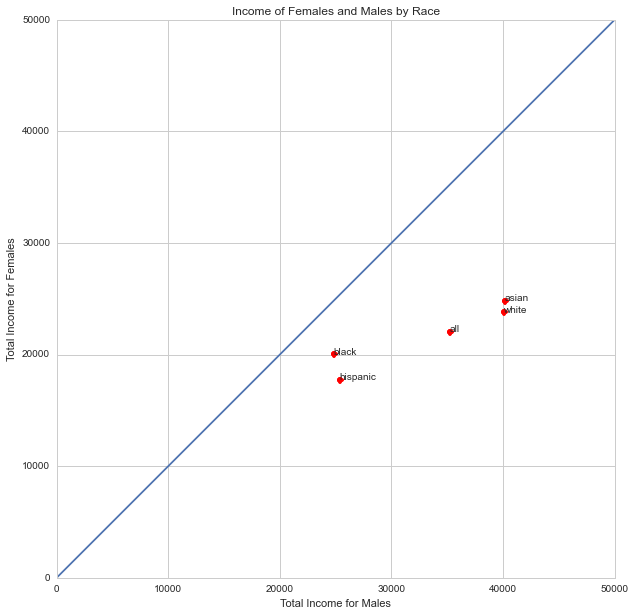

In [8]:
#Draw a plot of income by gender 

fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)

races = ['all', 'white', 'black', 'hispanic', 'asian']

ax.plot(male_income, female_income, 'ro')
for races, x, y in zip(races, male_income, female_income):
    ax.annotate(races, xy = (x,y))
ax.plot([1,50000], [1,50000]) #line of equality
ax.set_xlabel('Total Income for Males')
ax.set_ylabel('Total Income for Females')
ax.set_title('Income of Females and Males by Race')
ax.set_xlim(0, 50000)
ax.set_ylim(0, 50000)

* Now fit it with a line!

In [9]:
#Linear regression of the data 

X = sm.add_constant(male_income)
mod = sm.OLS(female_income, X).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Wed, 14 Oct 2015   Prob (F-statistic):             0.0176
Time:                        14:37:58   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9989.8444   2508.397      3.983      0.0

/Users/Camellia/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


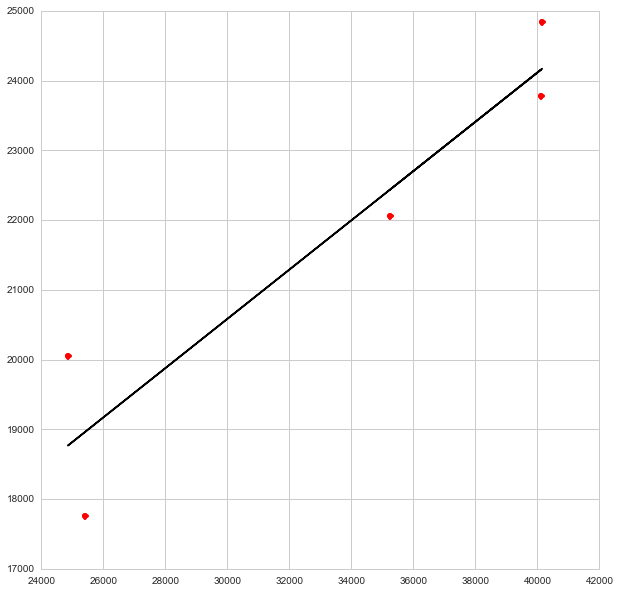

In [10]:
#Plot income by gender with the OLS line 

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(male_income, female_income, 'ro')
ax.plot(male_income, mod.predict(), 'k')

* Analytical Best Regression Line

In [11]:
cor = stats.spearmanr(female_income, male_income)
beta1=cor[0]*np.std(female_income)/np.std(male_income)
beta2 = np.mean(female_income)-(beta1*np.mean(male_income))
print cor, beta1, beta2

(0.90000000000000002, 0.037386073468498628) 0.338176888526 10485.9510732


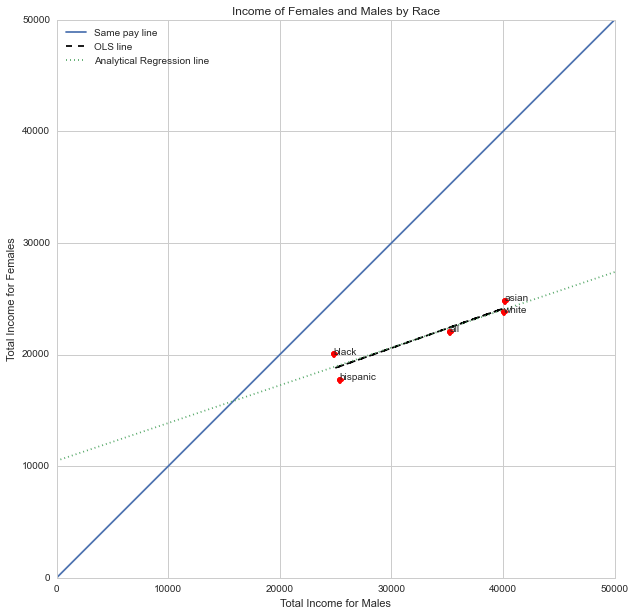

In [12]:
#plot the line corresponding to the analytical regression

fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)

races = ['all', 'white', 'black', 'hispanic', 'asian']

ax.plot(male_income, female_income, 'ro')
for races, x, y in zip(races, male_income, female_income):
    ax.annotate(races, xy = (x,y))

ax.plot([1,50000], [1,50000], linestyle='-', label='Same pay line') #line of equality

ax.plot(male_income, mod.predict(), 'k', linestyle='--', label='OLS line')

ax.plot([0, 50000], [0*beta1+beta2, 50000*beta1+beta2], linestyle=':', label = "Analytical Regression line")

ax.set_xlabel('Total Income for Males')
ax.set_ylabel('Total Income for Females')
ax.set_title('Income of Females and Males by Race')

ax.set_xlim(0, 50000)
ax.set_ylim(0, 50000)
ax.legend(loc='upper left')

* this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit

In [13]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,
                                      allmales['white']['Median income'][:].values,
                                      allmales['black']['Median income'][:].values,
                                      allmales['hispanic']['Median income'][:].values,
                                      allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,
                                        allfemales['white']['Median income'][:].values,
                                        allfemales['black']['Median income'][:].values,
                                        allfemales['hispanic']['Median income'][:].values,
                                        allfemales['asian']['Median income'][:].values]).flatten())

#I am gonna create the mask in the next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

In [14]:
#Fit OLS Regression 

X = sm.add_constant(all_females[~all_females.mask])
mod2 = sm.OLS(all_males[~all_males.mask], X).fit()
print mod2.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1075.
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           7.21e-77
Time:                        14:37:59   Log-Likelihood:                -1743.6
No. Observations:                 178   AIC:                             3491.
Df Residuals:                     176   BIC:                             3498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.5170    561.569     -0.004      0.9

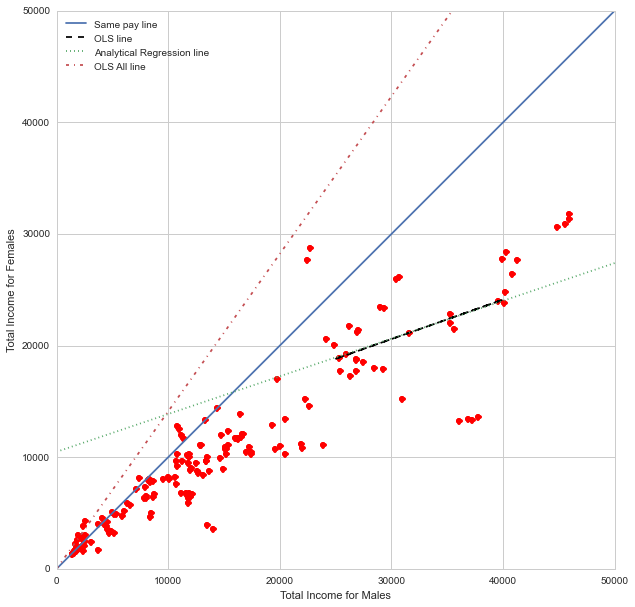

In [15]:
#plot total income by gender 

fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)

ax.plot(all_males, all_females, 'ro')

ax.plot([1,50000], [1,50000], linestyle='-', label='Same pay line') #line of equality

ax.plot(male_income, mod.predict(), 'k', linestyle='--', label='OLS line')

ax.plot([0, 50000], [0*beta1+beta2, 50000*beta1+beta2], linestyle=':', label = "Analytical Regression line")

ax.plot([0, 50000], [0*1.4110-2.5170, 50000*1.4110-2.5170], linestyle='-.', label = "OLS All line")

ax.set_xlabel('Total Income for Males')
ax.set_ylabel('Total Income for Females')

ax.set_xlim(0, 50000)
ax.set_ylim(0, 50000)
ax.legend(loc='upper left')

Now pick a stipend, maybe your ideal stipend?
and predict what a woman in a position where a man recieves your ideal stipend would make

In [16]:
intercept, slope = mod2.params 

idealStipend = 50000
#We have: idealStipend = femaleStipend*slope + intercept. Therefore:
 
femaleStipend = (idealStipend-intercept)/slope

print femaleStipend

35438.3627249


* Comments:

Among all races, it seems that men earn more than women. For blacks and hispanics, it appears that gender does not make a significant impact on income. However, for whites and asians, there is a significant difference in income based on gender. 